In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import swiftestio as swio
from astroquery.jplhorizons import Horizons

In [2]:
inparfile = 'param.gr.in'
paramgr = swio.read_swifter_param(inparfile)
swiftergr = swio.swifter2xr(paramgr)

Reading Swifter file param.gr.in


In [3]:
inparfile = 'param.nogr.in'
paramnogr = swio.read_swifter_param(inparfile)
swifternogr = swio.swifter2xr(paramnogr)

Reading Swifter file param.nogr.in


In [4]:
config_file_name = 'config.gr.in'
config = swio.read_swiftest_config(config_file_name)
swiftestdat = swio.swiftest2xr(config)

Reading Swiftest file config.gr.in


In [5]:
tsim = swiftergr['time'] / 365.25
varpigrsim = (swiftergr.sel(id=2)['omega'].data + swiftergr.sel(id=2)['capom'].data) * 180.0 / np.pi
varpinogrsim = (swifternogr.sel(id=2)['omega'].data + swifternogr.sel(id=2)['capom'].data) * 180.0 / np.pi
varpiswiftest = (swiftestdat.sel(id=2)['omega'].data + swiftestdat.sel(id=2)['capom'].data) * 180.0 / np.pi

In [6]:
obj = Horizons(id='1', id_type='majorbody',location='@sun',
               epochs={'start':'2020-07-13', 'stop':'3024-07-13',
                       'step':'1461d'})
el = obj.elements()
t = (el['datetime_jd']-el['datetime_jd'][0]) / 365.25
varpi = el['w'] + el['Omega']

In [7]:
dvarpigrsim = np.diff(varpigrsim) / np.diff(tsim) * 3600 * 100 
dvarpinogrsim = np.diff(varpinogrsim) / np.diff(tsim) * 3600 * 100 
dvarpiswiftest = np.diff(varpiswiftest) / np.diff(tsim) * 3600 * 100 
dvarpi= np.diff(varpi) / np.diff(t) * 3600 * 100 

Mean precession rate for Mercury long. peri. (arcsec/100 y)
JPL Horizons  : 570.3933741520308
Swifter no GR : 527.4373381337329
Swifter GR    : 570.37497883185
Swiftest GR   : 570.3749787753405
GR - no GR    : 42.93764069811709
Obs - Swifter : -0.018395320180843555
Obs - Swiftest: -0.018395376690250487


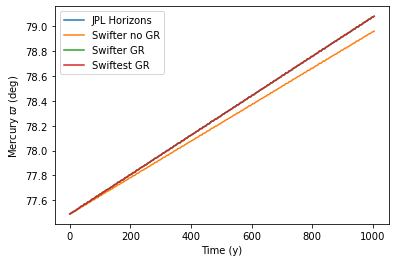

In [13]:
fig, ax = plt.subplots()

ax.plot(t, varpi, label="JPL Horizons")
ax.plot(tsim, varpinogrsim, label="Swifter no GR")
ax.plot(tsim, varpigrsim, label="Swifter GR")
ax.plot(tsim, varpiswiftest, label="Swiftest GR")
ax.set_xlabel('Time (y)')
ax.set_ylabel('Mercury $\\varpi$ (deg)')
ax.legend()
print('Mean precession rate for Mercury long. peri. (arcsec/100 y)')
print(f'JPL Horizons  : {np.mean(dvarpi)}')
print(f'Swifter no GR : {np.mean(dvarpinogrsim)}')
print(f'Swifter GR    : {np.mean(dvarpigrsim)}')
print(f'Swiftest GR   : {np.mean(dvarpiswiftest)}')
print(f'GR - no GR    : {np.mean(dvarpigrsim) - np.mean(dvarpinogrsim)}')
print(f'Obs - Swifter : {np.mean(dvarpigrsim) - np.mean(dvarpi)}')
print(f'Obs - Swiftest: {np.mean(dvarpiswiftest) - np.mean(dvarpi)}')